# Exploratory Data Analysis Exercise

Objective: Business Understanding and extracting information from customer briefing  
Technical: Combine multiple data sources, perform Exploratory Data Analysis   
Mathematical: Calculate descriptive statistics  
Data: In your [Google Drive EDA Project Folder](https://docs.google.com/spreadsheets/d/1RCZR7fOF4n7pFIrOgKqWtb4hAPmsV0N0JhgtT4k2wug/edit?usp=sharing)


In [115]:
#Import necessary package

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

In [117]:
#Load Dataset
Muesli_df = pd.read_csv("data/Group4_Muesli Project raw data - Orders.csv")
Cam_df = pd.read_csv('data/Campaign Data.csv')
pro_df = pd.read_csv('data/Order Process Data.csv')
Int_df = pd.read_csv('data/Intern Data Study.csv')


In [118]:
Int_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Order ID            290 non-null    object
 1   Ready to Ship Date  290 non-null    object
 2   Pickup Date         290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [119]:
#display the dataset
display(Muesli_df.head(5))
display(Cam_df.head(5))
display(pro_df.head(5))
display(Int_df.head(5))

,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.00,11.77
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.00,19.77
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,"19,901.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.00,4.95
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,"12,180.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.00,3.30
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,"90,004.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.00,6.15


,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron
2,CA-2019-130001,03/05/2019,Heather Kirkland
3,CA-2019-113061,06/05/2019,Ed Ludwig
4,CA-2019-162138,06/05/2019,Grace Kelly


,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,3074,CA-2019-125206,3/1/2019,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,09/01/2019,Standard Processing


,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,02/09/2019,03/09/2019
1,CA-2019-116540,02/09/2019,03/09/2019
2,CA-2019-129847,04/09/2019,04/09/2019
3,CA-2019-129630,04/09/2019,04/09/2019
4,CA-2019-106278,05/09/2019,06/09/2019


In [120]:
#drop Duplicates before merging
display(Cam_df.drop_duplicates())
display(pro_df.drop_duplicates())
display(Int_df.drop_duplicates())
display(Muesli_df.drop_duplicates())

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron
2,CA-2019-130001,03/05/2019,Heather Kirkland
3,CA-2019-113061,06/05/2019,Ed Ludwig
4,CA-2019-162138,06/05/2019,Grace Kelly
...,...,...,...
328,CA-2020-129707,08/05/2020,Larry Hughes
329,CA-2020-125381,08/05/2020,Speros Goranitis
330,CA-2020-141733,15/05/2020,Rick Wilson
331,US-2020-104451,15/05/2020,Michelle Moray


,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,3074,CA-2019-125206,3/1/2019,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
...,...,...,...,...,...
5894,908,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
5895,909,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
5896,1297,CA-2020-115427,30/12/2020,06/01/2021,Standard Processing
5897,1298,CA-2020-115427,30/12/2020,06/01/2021,Standard Processing


,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,02/09/2019,03/09/2019
2,CA-2019-129847,04/09/2019,04/09/2019
3,CA-2019-129630,04/09/2019,04/09/2019
4,CA-2019-106278,05/09/2019,06/09/2019
5,CA-2019-158099,05/09/2019,06/09/2019
...,...,...,...
283,US-2020-165456,03/12/2020,04/12/2020
284,US-2020-110576,04/12/2020,07/12/2020
285,CA-2020-105333,04/12/2020,07/12/2020
288,CA-2020-119305,04/12/2020,07/12/2020


,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.00,11.77
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.00,19.77
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,"19,901.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.00,4.95
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,"12,180.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.00,3.30
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,"90,004.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.00,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9894,US-2019-115441,25/7/2019,Second Class,SH-19975,Sally Hughsby,Sales,United States,Milwaukee,Wisconsin,"53,209.00",Central,Toasted Muesli,With Nuts,FUR-CH-10004626,403.56,4,0.00,96.85
9990,9908,US-2018-129007,13/9/2018,First Class,KD-16615,Ken Dana,Sales,United States,Anaheim,California,"92,804.00",West,Toasted Muesli,With Nuts,FUR-CH-10000155,717.72,3,0.20,71.77
9991,9913,CA-2018-132388,10/10/2018,First Class,KN-16390,Katherine Nockton,Sales,United States,Santa Barbara,California,"93,101.00",West,Toasted Muesli,With Nuts,FUR-CH-10001714,362.14,3,0.20,-54.32
9992,9920,CA-2019-149272,15/3/2019,Standard Class,MY-18295,Muhammed Yedwab,Sales,United States,Bryan,Texas,"77,803.00",Central,Toasted Muesli,With Nuts,FUR-CH-10000863,528.43,5,0.30,-143.43


In [121]:
#lets combine the DataSet
#we'll begin with the smaller datasets
Pro_Int_df = pd.merge(Int_df, pro_df, on =['Order ID'],how = 'outer') #merged order process data and Intern Data using order id
display(Pro_Int_df.head(5))


,Order ID,Ready to Ship Date,Pickup Date,Row ID,Order Date,On Truck Scan Date,Ship Mode
0,CA-2019-116540,02/09/2019,03/09/2019,3416,2/9/2019,03/09/2019,Express
1,CA-2019-116540,02/09/2019,03/09/2019,3417,2/9/2019,03/09/2019,Express
2,CA-2019-116540,02/09/2019,03/09/2019,3416,2/9/2019,03/09/2019,Express
3,CA-2019-116540,02/09/2019,03/09/2019,3417,2/9/2019,03/09/2019,Express
4,CA-2019-129847,04/09/2019,04/09/2019,6937,2/9/2019,04/09/2019,Express


In [122]:
Pro_Int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 0 to 6233
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Order ID            6234 non-null   object
 1   Ready to Ship Date  753 non-null    object
 2   Pickup Date         753 non-null    object
 3   Row ID              6234 non-null   int64 
 4   Order Date          6234 non-null   object
 5   On Truck Scan Date  6234 non-null   object
 6   Ship Mode           6234 non-null   object
dtypes: int64(1), object(6)
memory usage: 389.6+ KB


In [123]:
Cam_pro_int_df = pd.merge(Pro_Int_df, Cam_df, on = ['Order ID'],how = 'outer') #merged with Campaign data using order id 
display(Cam_pro_int_df.head(5))

,Order ID,Ready to Ship Date,Pickup Date,Row ID,Order Date,On Truck Scan Date,Ship Mode,Arrival Scan Date,Customer Name
0,CA-2019-116540,02/09/2019,03/09/2019,3416,2/9/2019,03/09/2019,Express,NaN,NaN
1,CA-2019-116540,02/09/2019,03/09/2019,3417,2/9/2019,03/09/2019,Express,NaN,NaN
2,CA-2019-116540,02/09/2019,03/09/2019,3416,2/9/2019,03/09/2019,Express,NaN,NaN
3,CA-2019-116540,02/09/2019,03/09/2019,3417,2/9/2019,03/09/2019,Express,NaN,NaN
4,CA-2019-129847,04/09/2019,04/09/2019,6937,2/9/2019,04/09/2019,Express,10/09/2019,Tom Ashbrook


In [124]:
Cam_pro_int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 0 to 6233
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Order ID            6234 non-null   object
 1   Ready to Ship Date  753 non-null    object
 2   Pickup Date         753 non-null    object
 3   Row ID              6234 non-null   int64 
 4   Order Date          6234 non-null   object
 5   On Truck Scan Date  6234 non-null   object
 6   Ship Mode           6234 non-null   object
 7   Arrival Scan Date   711 non-null    object
 8   Customer Name       711 non-null    object
dtypes: int64(1), object(8)
memory usage: 487.0+ KB


In [125]:
#we are left with two datasets, Muesli and the combined dataset
display(Muesli_df.head(5))                   #Muesli data
display(Cam_pro_int_df.head(5))              #Combined data


,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.00,11.77
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.00,19.77
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,"19,901.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.00,4.95
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,"12,180.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.00,3.30
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,"90,004.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.00,6.15


,Order ID,Ready to Ship Date,Pickup Date,Row ID,Order Date,On Truck Scan Date,Ship Mode,Arrival Scan Date,Customer Name
0,CA-2019-116540,02/09/2019,03/09/2019,3416,2/9/2019,03/09/2019,Express,NaN,NaN
1,CA-2019-116540,02/09/2019,03/09/2019,3417,2/9/2019,03/09/2019,Express,NaN,NaN
2,CA-2019-116540,02/09/2019,03/09/2019,3416,2/9/2019,03/09/2019,Express,NaN,NaN
3,CA-2019-116540,02/09/2019,03/09/2019,3417,2/9/2019,03/09/2019,Express,NaN,NaN
4,CA-2019-129847,04/09/2019,04/09/2019,6937,2/9/2019,04/09/2019,Express,10/09/2019,Tom Ashbrook


In [126]:
##lets see what is in our data and how to combine this two dataset
#lets start with Muesli Dataset
display(Muesli_df.columns)
display(Muesli_df.info())
display(Muesli_df.shape)
display(Muesli_df['Order ID'].unique())                   #No repetition

Index(['Index', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Mode       9994 non-null   object 
 4   Customer ID     9994 non-null   object 
 5   Customer Name   9994 non-null   object 
 6   Origin Channel  9994 non-null   object 
 7   Country/Region  9994 non-null   object 
 8   City            9994 non-null   object 
 9   State           9994 non-null   object 
 10  Postal Code     9983 non-null   float64
 11  Region          9994 non-null   object 
 12  Category        9994 non-null   object 
 13  Sub-Category    9994 non-null   object 
 14  Product ID      9994 non-null   object 
 15  Sales           9994 non-null   float64
 16  Quantity        9994 non-null   int64  
 17  Discount        9994 non-null   f

None

(9994, 19)

array(['CA-2019-121755', 'CA-2019-118255', 'CA-2019-169194', ...,
       'CA-2020-107209', 'US-2020-152842', 'CA-2019-122581'], dtype=object)

In [127]:
display(Cam_pro_int_df.columns)
display(Cam_pro_int_df.info())
display(Cam_pro_int_df.shape)
display(Cam_pro_int_df['Order ID'].unique())   #No Repetition

Index(['Order ID', 'Ready to Ship Date', 'Pickup Date', 'Row ID', 'Order Date',
       'On Truck Scan Date', 'Ship Mode', 'Arrival Scan Date',
       'Customer Name'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 0 to 6233
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Order ID            6234 non-null   object
 1   Ready to Ship Date  753 non-null    object
 2   Pickup Date         753 non-null    object
 3   Row ID              6234 non-null   int64 
 4   Order Date          6234 non-null   object
 5   On Truck Scan Date  6234 non-null   object
 6   Ship Mode           6234 non-null   object
 7   Arrival Scan Date   711 non-null    object
 8   Customer Name       711 non-null    object
dtypes: int64(1), object(8)
memory usage: 487.0+ KB


None

(6234, 9)

array(['CA-2019-116540', 'CA-2019-129847', 'CA-2019-129630', ...,
       'CA-2020-143259', 'CA-2020-115427', 'CA-2020-156720'], dtype=object)

In [128]:
#Before we try to merge this two lets see if they have any thing in common
#Muesli_df['Order ID'].equals(Cam_pro_int_df['Order ID'])     
# #Before we try to merge this two lets see if they have any thing in common
for i in Muesli_df['Order ID'].unique():
    for j in Cam_pro_int_df['Order ID'].unique():
        if j in i:
            print(j)
       # 22 

CA-2019-121755
CA-2019-118255
CA-2019-169194
CA-2019-111682
CA-2020-155558
CA-2019-158568
CA-2020-119004
US-2020-100930
CA-2019-145625
CA-2020-163139
CA-2019-110772
CA-2019-162138
CA-2019-129714
CA-2020-101798
CA-2019-108987
CA-2020-117457
US-2019-123750
CA-2019-100153
CA-2019-169166
CA-2020-135307
US-2019-139486
US-2019-135720
CA-2020-144694
CA-2020-106103
CA-2019-160745
CA-2020-140844
CA-2020-130351
US-2020-119438
US-2020-100048
CA-2020-131954
CA-2020-143686
CA-2020-101434
CA-2019-134474
CA-2019-116736
CA-2020-132934
CA-2020-137596
CA-2020-102519
US-2020-111745
CA-2019-102981
CA-2019-134348
CA-2019-107216
CA-2020-140585
CA-2019-168081
CA-2019-130946
US-2020-118087
CA-2019-126004
US-2019-168620
CA-2019-119186
CA-2020-157651
US-2020-155425
CA-2020-136672
CA-2019-124485
CA-2020-115994
CA-2019-152289
US-2019-108098
CA-2020-120761
US-2019-113509
CA-2020-108560
CA-2019-106530
US-2020-132444
CA-2019-128531
CA-2019-107615
US-2019-158708
CA-2019-106894
CA-2020-152807
CA-2019-129686
CA-2019-12

In [129]:
Cam_pro_int_df['Order ID'].unique()


array(['CA-2019-116540', 'CA-2019-129847', 'CA-2019-129630', ...,
       'CA-2020-143259', 'CA-2020-115427', 'CA-2020-156720'], dtype=object)

In [130]:
#LETS MERGE
Muesli_df2 = Muesli_df.merge(Cam_pro_int_df, on = 'Order ID', how = 'left')
Muesli_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23171 entries, 0 to 23170
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               23171 non-null  int64  
 1   Order ID            23171 non-null  object 
 2   Order Date_x        23171 non-null  object 
 3   Ship Mode_x         23171 non-null  object 
 4   Customer ID         23171 non-null  object 
 5   Customer Name_x     23171 non-null  object 
 6   Origin Channel      23171 non-null  object 
 7   Country/Region      23171 non-null  object 
 8   City                23171 non-null  object 
 9   State               23171 non-null  object 
 10  Postal Code         23142 non-null  float64
 11  Region              23171 non-null  object 
 12  Category            23171 non-null  object 
 13  Sub-Category        23171 non-null  object 
 14  Product ID          23171 non-null  object 
 15  Sales               23171 non-null  float64
 16  Quan

In [131]:
display(Muesli_df2.head())

,Index,Order ID,Order Date_x,Ship Mode_x,Customer ID,Customer Name_x,Origin Channel,Country/Region,City,State,...,Discount,Profit,Ready to Ship Date,Pickup Date,Row ID,Order Date_y,On Truck Scan Date,Ship Mode_y,Arrival Scan Date,Customer Name_y
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,0.00,11.77,NaN,NaN,26.00,16/1/2019,23/01/2019,Standard Processing,NaN,NaN
1,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,0.00,11.77,NaN,NaN,27.00,16/1/2019,23/01/2019,Standard Processing,NaN,NaN
2,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,0.00,19.77,NaN,NaN,45.00,11/3/2019,13/03/2019,Express,NaN,NaN
3,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,0.00,19.77,NaN,NaN,46.00,11/3/2019,13/03/2019,Express,NaN,NaN
4,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,...,0.00,4.95,NaN,NaN,48.00,20/6/2019,26/06/2019,Standard Processing,NaN,NaN


In [132]:
Muesli_df2=Muesli_df2.drop_duplicates()
display(Muesli_df2.duplicated().value_counts()) #To count duplicates
display(Muesli_df2.duplicated().sum())

False    21620
dtype: int64

0

In [133]:
Muesli_df2.head(20)

,Index,Order ID,Order Date_x,Ship Mode_x,Customer ID,Customer Name_x,Origin Channel,Country/Region,City,State,...,Discount,Profit,Ready to Ship Date,Pickup Date,Row ID,Order Date_y,On Truck Scan Date,Ship Mode_y,Arrival Scan Date,Customer Name_y
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,0.00,11.77,NaN,NaN,26.00,16/1/2019,23/01/2019,Standard Processing,NaN,NaN
1,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,0.00,11.77,NaN,NaN,27.00,16/1/2019,23/01/2019,Standard Processing,NaN,NaN
2,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,0.00,19.77,NaN,NaN,45.00,11/3/2019,13/03/2019,Express,NaN,NaN
3,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,0.00,19.77,NaN,NaN,46.00,11/3/2019,13/03/2019,Express,NaN,NaN
4,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,...,0.00,4.95,NaN,NaN,48.00,20/6/2019,26/06/2019,Standard Processing,NaN,NaN
5,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,...,0.00,4.95,NaN,NaN,49.00,20/6/2019,26/06/2019,Standard Processing,NaN,NaN
6,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,...,0.00,3.30,NaN,NaN,56.00,17/6/2019,19/06/2019,Express,NaN,NaN
7,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,...,0.00,3.30,NaN,NaN,57.00,17/6/2019,19/06/2019,Express,NaN,NaN
8,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,...,0.00,3.30,NaN,NaN,58.00,17/6/2019,19/06/2019,Express,NaN,NaN
9,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,...,0.00,3.30,NaN,NaN,59.00,17/6/2019,19/06/2019,Express,NaN,NaN


In [134]:
Muesli_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21620 entries, 0 to 23170
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               21620 non-null  int64  
 1   Order ID            21620 non-null  object 
 2   Order Date_x        21620 non-null  object 
 3   Ship Mode_x         21620 non-null  object 
 4   Customer ID         21620 non-null  object 
 5   Customer Name_x     21620 non-null  object 
 6   Origin Channel      21620 non-null  object 
 7   Country/Region      21620 non-null  object 
 8   City                21620 non-null  object 
 9   State               21620 non-null  object 
 10  Postal Code         21591 non-null  float64
 11  Region              21620 non-null  object 
 12  Category            21620 non-null  object 
 13  Sub-Category        21620 non-null  object 
 14  Product ID          21620 non-null  object 
 15  Sales               21620 non-null  float64
 16  Quan

In [135]:
#Make the column fancy
Muesli_df2.rename(columns=lambda x : x.lower(), inplace=True)
Muesli_df2.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
Muesli_df2.tail(5)



,index,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,origin_channel,country/region,city,state,...,discount,profit,ready_to_ship_date,pickup_date,row_id,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y
23166,9948,CA-2020-121559,1/6/2020,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,...,0.00,539.25,NaN,NaN,"9,948.00",1/6/2020,05/06/2020,Standard Processing,NaN,NaN
23167,9948,CA-2020-121559,1/6/2020,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,...,0.00,539.25,NaN,NaN,"9,949.00",1/6/2020,05/06/2020,Standard Processing,NaN,NaN
23168,9948,CA-2020-121559,1/6/2020,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,...,0.00,539.25,NaN,NaN,"9,950.00",1/6/2020,05/06/2020,Standard Processing,NaN,NaN
23169,9948,CA-2020-121559,1/6/2020,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,...,0.00,539.25,NaN,NaN,"9,951.00",1/6/2020,05/06/2020,Standard Processing,NaN,NaN
23170,9948,CA-2020-121559,1/6/2020,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,...,0.00,539.25,NaN,NaN,"9,952.00",1/6/2020,05/06/2020,Standard Processing,NaN,NaN


In [136]:
Muesli_df2.columns

Index(['index', 'order_id', 'order_date_x', 'ship_mode_x', 'customer_id',
       'customer_name_x', 'origin_channel', 'country/region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub-category', 'product_id',
       'sales', 'quantity', 'discount', 'profit', 'ready_to_ship_date',
       'pickup_date', 'row_id', 'order_date_y', 'on_truck_scan_date',
       'ship_mode_y', 'arrival_scan_date', 'customer_name_y'],
      dtype='object')

In [137]:
#Dropped Columns
Muesli_df2=Muesli_df2.drop(columns= ['order_date_y','sales', 'quantity', 'discount', 'profit','row_id'], axis=1)

In [138]:
Muesli_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21620 entries, 0 to 23170
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               21620 non-null  int64  
 1   order_id            21620 non-null  object 
 2   order_date_x        21620 non-null  object 
 3   ship_mode_x         21620 non-null  object 
 4   customer_id         21620 non-null  object 
 5   customer_name_x     21620 non-null  object 
 6   origin_channel      21620 non-null  object 
 7   country/region      21620 non-null  object 
 8   city                21620 non-null  object 
 9   state               21620 non-null  object 
 10  postal_code         21591 non-null  float64
 11  region              21620 non-null  object 
 12  category            21620 non-null  object 
 13  sub-category        21620 non-null  object 
 14  product_id          21620 non-null  object 
 15  ready_to_ship_date  1220 non-null   object 
 16  pick

In [139]:
#drop more columns
Muesli_df2=Muesli_df2.drop(columns= ['ship_mode_y', 'customer_name_y','product_id'], axis=1)

In [140]:
Muesli_df2['order_date_x'] = pd.to_datetime(Muesli_df2['order_date_x'], errors='coerce')
Muesli_df2['ready_to_ship_date'] = pd.to_datetime(Muesli_df2['ready_to_ship_date'], errors='coerce')
Muesli_df2['pickup_date'] = pd.to_datetime(Muesli_df2['pickup_date'], errors='coerce')
Muesli_df2['on_truck_scan_date'] = pd.to_datetime(Muesli_df2['on_truck_scan_date'], errors='coerce')
Muesli_df2['arrival_scan_date'] = pd.to_datetime(Muesli_df2['arrival_scan_date'], errors='coerce')

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/11/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26/10/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/11/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/l

In [141]:
Muesli_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21620 entries, 0 to 23170
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               21620 non-null  int64         
 1   order_id            21620 non-null  object        
 2   order_date_x        21620 non-null  datetime64[ns]
 3   ship_mode_x         21620 non-null  object        
 4   customer_id         21620 non-null  object        
 5   customer_name_x     21620 non-null  object        
 6   origin_channel      21620 non-null  object        
 7   country/region      21620 non-null  object        
 8   city                21620 non-null  object        
 9   state               21620 non-null  object        
 10  postal_code         21591 non-null  float64       
 11  region              21620 non-null  object        
 12  category            21620 non-null  object        
 13  sub-category        21620 non-null  object    

In [142]:
#Add order day using order date
order_day1 = []
for datee in Muesli_df2.order_date_x:
    order_dayy = pd.Timestamp(datee)
    d= order_dayy.day_name()
    order_day1.append(d)
    
Muesli_df2['order_day'] = order_day1

In [143]:
Muesli_df2

,index,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,origin_channel,country/region,city,state,postal_code,region,category,sub-category,ready_to_ship_date,pickup_date,on_truck_scan_date,arrival_scan_date,order_day
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,NaT,NaT,2019-01-23,NaT,Wednesday
1,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,NaT,NaT,2019-01-23,NaT,Wednesday
2,45,CA-2019-118255,2019-11-03,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,NaT,NaT,2019-03-13,NaT,Sunday
3,45,CA-2019-118255,2019-11-03,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,NaT,NaT,2019-03-13,NaT,Sunday
4,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,"19,901.00",East,Special Projects Muesil,Gluten Free,NaT,NaT,2019-06-26,NaT,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23166,9948,CA-2020-121559,2020-01-06,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,"46,203.00",Central,Toasted Muesli,With Nuts,NaT,NaT,2020-05-06,NaT,Monday
23167,9948,CA-2020-121559,2020-01-06,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,"46,203.00",Central,Toasted Muesli,With Nuts,NaT,NaT,2020-05-06,NaT,Monday
23168,9948,CA-2020-121559,2020-01-06,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,"46,203.00",Central,Toasted Muesli,With Nuts,NaT,NaT,2020-05-06,NaT,Monday
23169,9948,CA-2020-121559,2020-01-06,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,"46,203.00",Central,Toasted Muesli,With Nuts,NaT,NaT,2020-05-06,NaT,Monday


In [144]:
Muesli_df2.order_day.unique()

array(['Wednesday', 'Sunday', 'Thursday', 'Monday', 'Saturday', 'Tuesday',
       'Friday'], dtype=object)

In [145]:
#drop index column
Muesli_df2=Muesli_df2.drop(columns= ['index'], axis=1)

In [146]:
Muesli_df2

,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,origin_channel,country/region,city,state,postal_code,region,category,sub-category,ready_to_ship_date,pickup_date,on_truck_scan_date,arrival_scan_date,order_day
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,NaT,NaT,2019-01-23,NaT,Wednesday
1,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,NaT,NaT,2019-01-23,NaT,Wednesday
2,CA-2019-118255,2019-11-03,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,NaT,NaT,2019-03-13,NaT,Sunday
3,CA-2019-118255,2019-11-03,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,NaT,NaT,2019-03-13,NaT,Sunday
4,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,"19,901.00",East,Special Projects Muesil,Gluten Free,NaT,NaT,2019-06-26,NaT,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23166,CA-2020-121559,2020-01-06,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,"46,203.00",Central,Toasted Muesli,With Nuts,NaT,NaT,2020-05-06,NaT,Monday
23167,CA-2020-121559,2020-01-06,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,"46,203.00",Central,Toasted Muesli,With Nuts,NaT,NaT,2020-05-06,NaT,Monday
23168,CA-2020-121559,2020-01-06,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,"46,203.00",Central,Toasted Muesli,With Nuts,NaT,NaT,2020-05-06,NaT,Monday
23169,CA-2020-121559,2020-01-06,Second Class,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,"46,203.00",Central,Toasted Muesli,With Nuts,NaT,NaT,2020-05-06,NaT,Monday


In [147]:
#Muesli_df2.duplicated.value_co
display(Muesli_df2.duplicated().value_counts())
Muesli_df2 = Muesli_df2.drop_duplicates()

True     12459
False     9161
dtype: int64

In [148]:
Muesli_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9161 entries, 0 to 23166
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            9161 non-null   object        
 1   order_date_x        9161 non-null   datetime64[ns]
 2   ship_mode_x         9161 non-null   object        
 3   customer_id         9161 non-null   object        
 4   customer_name_x     9161 non-null   object        
 5   origin_channel      9161 non-null   object        
 6   country/region      9161 non-null   object        
 7   city                9161 non-null   object        
 8   state               9161 non-null   object        
 9   postal_code         9151 non-null   float64       
 10  region              9161 non-null   object        
 11  category            9161 non-null   object        
 12  sub-category        9161 non-null   object        
 13  ready_to_ship_date  388 non-null    datetime64[

In [149]:
Muesli_df2.ship_mode_x.unique()

array(['Second Class', 'First Class', 'Standard Class'], dtype=object)

In [169]:
Muesli_df2.groupby('ship_mode_x').count()

,order_id,order_date_x,customer_id,customer_name_x,origin_channel,country/region,city,state,postal_code,region,category,sub-category,ready_to_ship_date,pickup_date,on_truck_scan_date,arrival_scan_date,order_day,days_to_arrive
ship_mode_x,,,,,,,,,,,,,,,,,,
First Class,1903,1903,1903,1903,1903,1903,1903,1903,1903,1903,1903,1903,91,91,1191,133,1903,1191
Second Class,1784,1784,1784,1784,1784,1784,1784,1784,1783,1784,1784,1784,88,88,1054,104,1784,1054
Standard Class,5474,5474,5474,5474,5474,5474,5474,5474,5465,5474,5474,5474,209,209,3171,354,5474,3171


In [166]:
#create new column for no of days it took to ship products
Muesli_df2['days_to_arrive'] = (Muesli_df2['on_truck_scan_date']- Muesli_df2['order_date_x']).dt.days


/var/folders/m6/yd1mb3sx4sd06br49rg_pbch0000gn/T/ipykernel_71791/4038539895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Muesli_df2['days_to_arrive'] = (Muesli_df2['on_truck_scan_date']- Muesli_df2['order_date_x']).dt.days


In [167]:
Muesli_df2.days_to_arrive.unique()

array([   7., -235.,    6.,    2.,   nan, -198., -142., -285.,  -80.,
        -52.,   91., -108.,   90.,   34.,   35.,  126.,    9.,    5.,
       -113.,    1.,    3., -111.,   36.,  184.,    8.,    4.,  213.,
         31.,  153.,  -21., -109.,   61.,   68.,   65.,  123.,    0.,
       -202., -288.,  -82.,   10., -171., -229.,  -23., -203.,   69.,
        -51.,   67.,  214.,   92.,   96.,  -50.,   97.,  274., -114.,
       -199., -145.,  -57.,  -28., -167.,  121.,  125., -196.,   63.,
       -228.,   66.,  -22.,  245.,  -81., -231.,   38.,   93.,   95.,
        -84., -226.,  152.,   62., -139.,  212.,  186.,  244., -256.,
       -174., -230.,  -53.,  -79.,  -24., -172.,   30., -227., -140.,
        -55.,  304.,   32.,  275., -200.,   37., -204., -170.,  182.,
       -232., -286.,  157., -169.,  158.,  128.,  183., -115.,  273.,
       -143., -112.,  -83., -195.,  -54.,  127., -107.,  122., -262.,
       -201.,  215.,   94.,  154.,  151.,  155.,   60.,  156.,  -20.,
        181., -110.,

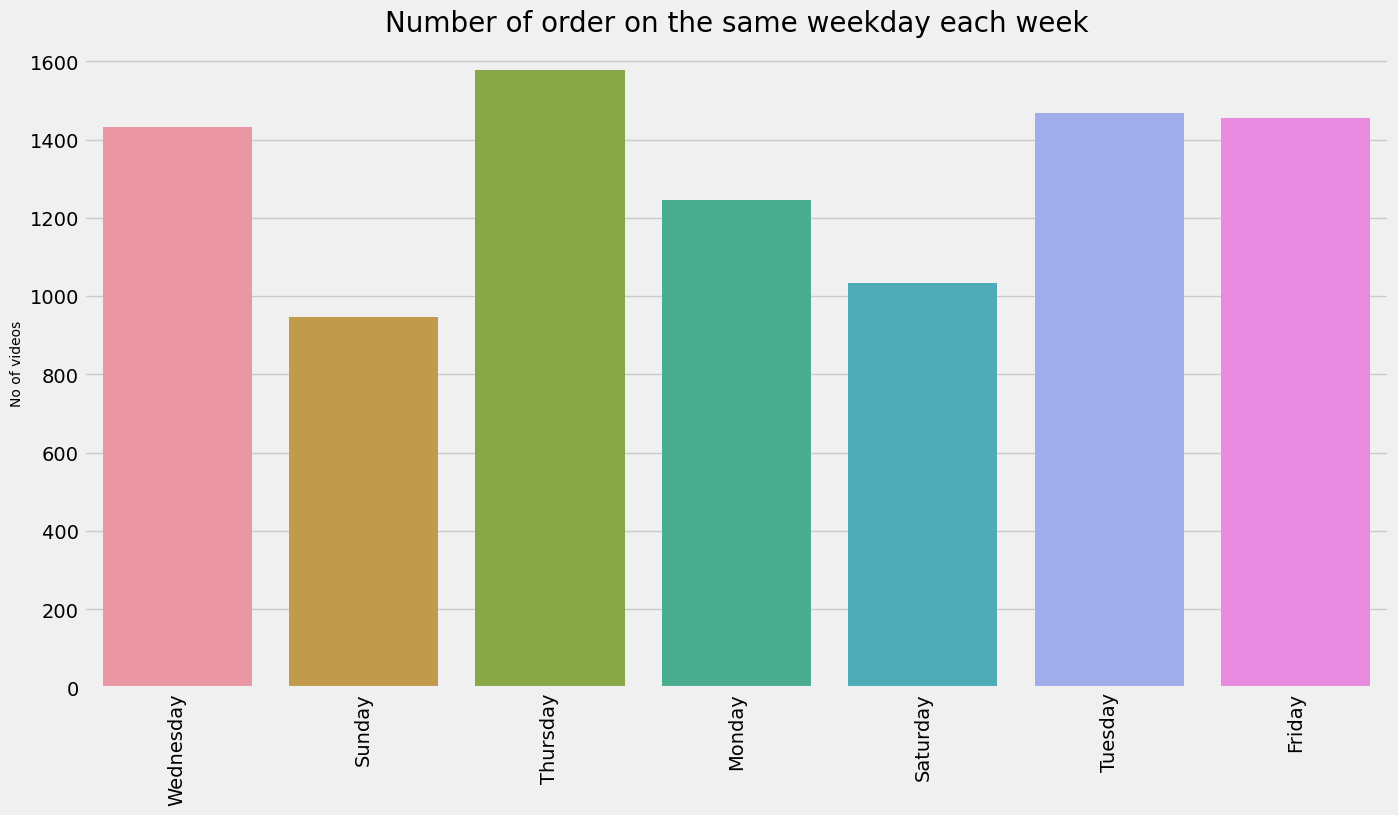

In [150]:
#Visualization
# Plot number of videos per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.countplot(x=Muesli_df2['order_day']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("No of order", fontsize = 10); # set label for y-axis
f1.set_title('Number of order on the same weekday each week', fontsize=20); # set title

In [ ]:
#Ship_mode
 

In [ ]:
##grouped barplot